In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statistics as st

In [ ]:
data=pd.read_excel("OnlineRetail (1).xlsx")

In [ ]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data['Description']=data['Description'].astype(str)
stockdescriptions = data.pivot_table(index='StockCode' , values='Description' , aggfunc=st.mode)
stockdescriptions

,Description
StockCode,
10002,INFLATABLE POLITICAL GLOBE
10080,GROOVY CACTUS INFLATABLE
10120,DOGGY RUBBER
10125,MINI FUNKY DESIGN TAPES
10133,COLOURING PENCILS BROWN TUBE
...,...
gift_0001_20,Dotcomgiftshop Gift Voucher �20.00
gift_0001_30,Dotcomgiftshop Gift Voucher �30.00
gift_0001_40,Dotcomgiftshop Gift Voucher �40.00


In [ ]:
nullcustomerids=data[data['CustomerID'].isnull()]
nullcustomerids

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
uniqueinvoice=nullcustomerids.InvoiceNo.unique()
newids=np.arange(20000.0,20000.0+len(uniqueinvoice),1)
series=pd.Series(np.arange(20000.0,20000.0+len(uniqueinvoice),1),index=uniqueinvoice)
data.CustomerID[data['CustomerID'].isnull()] = data.InvoiceNo[data.CustomerID.isnull()].map(series)

<ipython-input-5-114dc56319e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.CustomerID[data['CustomerID'].isnull()] = data.InvoiceNo[data.CustomerID.isnull()].map(series)


In [ ]:
data.Quantity[data.Quantity < 1]*=-1

<ipython-input-7-59080f31cbda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Quantity[data.Quantity < 1]*=-1


In [ ]:
import seaborn as sns

**### GLOBAL POPULAR ITEMS ###**

In [ ]:
global_table=data.pivot_table(index='StockCode' , values='Quantity' , aggfunc=np.sum)
global_table=global_table.sort_values(by='Quantity' , ascending=False)
global_table['Description'] = global_table.index.map(stockdescriptions['Description'])
global_table.head(10)

,Quantity,Description
StockCode,,
23843,161990,"PAPER CRAFT , LITTLE BIRDIE"
23166,152527,MEDIUM CERAMIC TOP STORAGE JAR
22197,57392,POPCORN HOLDER
84077,56247,WORLD WAR 2 GLIDERS ASSTD DESIGNS
85099B,49593,JUMBO BAG RED RETROSPOT
85123A,44498,WHITE HANGING HEART T-LIGHT HOLDER
21212,36799,PACK OF 72 RETROSPOT CAKE CASES
84879,36701,ASSORTED COLOUR BIRD ORNAMENT
23084,32798,RABBIT NIGHT LIGHT


<Axes: xlabel='Quantity', ylabel='Description'>

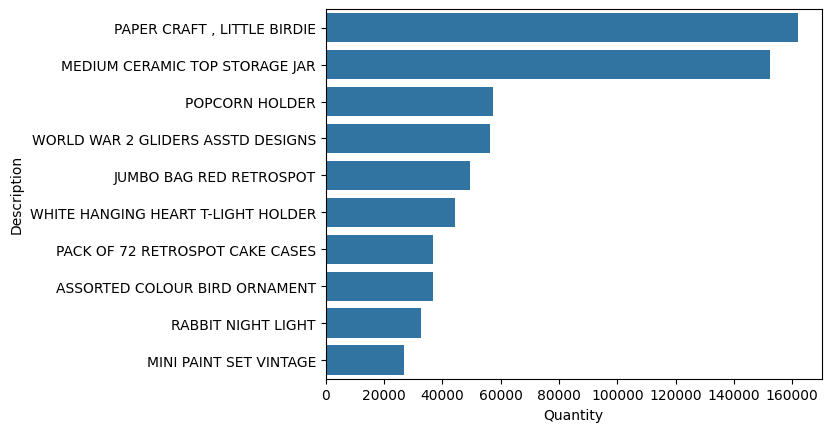

In [ ]:
sns.barplot(x='Quantity' , y='Description' , data=global_table.head(10))

In [ ]:
monthly_table=data.pivot_table(index='StockCode' , columns=data.InvoiceDate.dt.strftime('%b'), values='Quantity',aggfunc=np.sum , fill_value=0)
monthly_table=monthly_table.reindex(columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
monthly_table['Description'] = monthly_table.index.map(stockdescriptions['Description'])

**### MONTHLY POPULAR ITEMS ###**

### Jan ###
InvoiceDate     Jan                         Description
StockCode                                              
23166        148430      MEDIUM CERAMIC TOP STORAGE JAR
37413          5568              ICON MUG REVOLUTIONARY
85123A         5544  WHITE HANGING HEART T-LIGHT HOLDER
21212          3413     PACK OF 72 RETROSPOT CAKE CASES
21108          3246  FAIRY CAKE FLANNEL ASSORTED COLOUR 




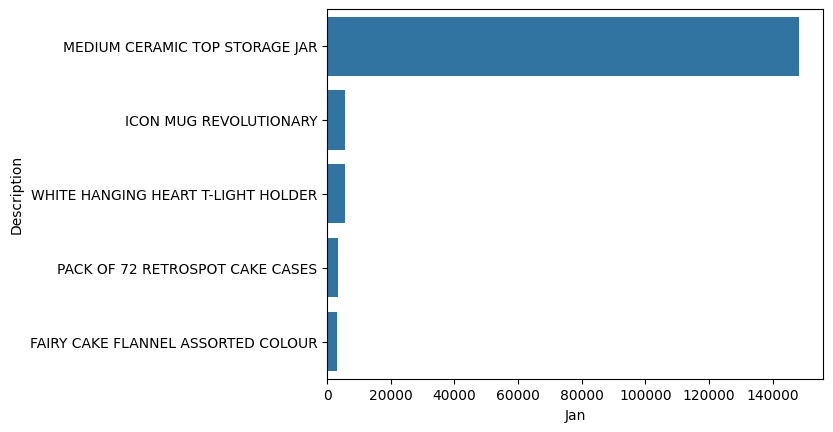

### Feb ###
InvoiceDate   Feb                         Description
StockCode                                            
22053        3986               EMPIRE DESIGN ROSETTE
22693        3795  GROW A FLYTRAP OR SUNFLOWER IN TIN
84077        3518   WORLD WAR 2 GLIDERS ASSTD DESIGNS
85099B       3082             JUMBO BAG RED RETROSPOT
22616        2725           PACK OF 12 LONDON TISSUES 




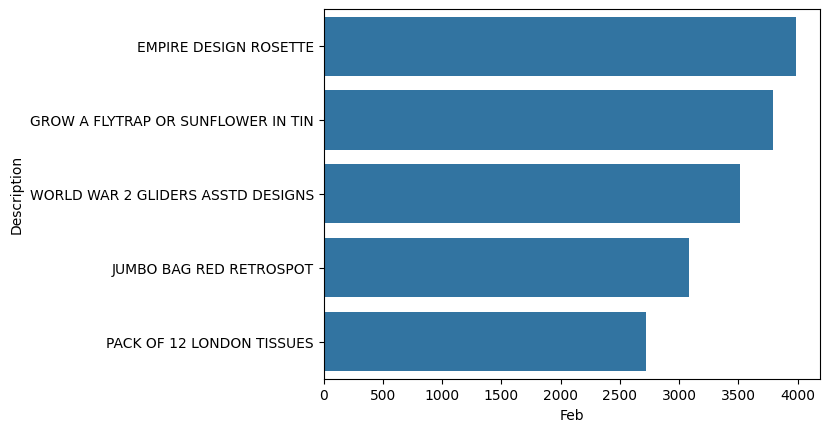

### Mar ###
InvoiceDate   Mar                        Description
StockCode                                           
72140F       5368                         throw away
85099B       5283            JUMBO BAG RED RETROSPOT
21212        3975    PACK OF 72 RETROSPOT CAKE CASES
84077        3888  WORLD WAR 2 GLIDERS ASSTD DESIGNS
22616        3645          PACK OF 12 LONDON TISSUES 




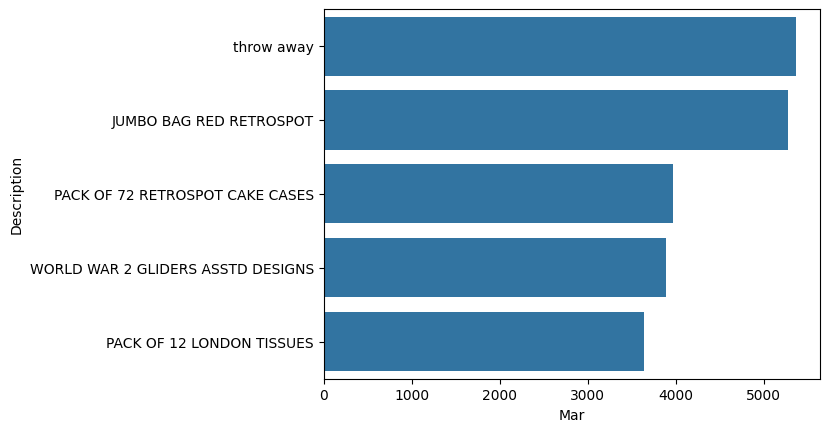

### Apr ###
InvoiceDate    Apr                         Description
StockCode                                             
84077        10335   WORLD WAR 2 GLIDERS ASSTD DESIGNS
21108         6259  FAIRY CAKE FLANNEL ASSORTED COLOUR
85123A        5779  WHITE HANGING HEART T-LIGHT HOLDER
21175         4509         GIN + TONIC DIET METAL SIGN
21212         3068     PACK OF 72 RETROSPOT CAKE CASES 




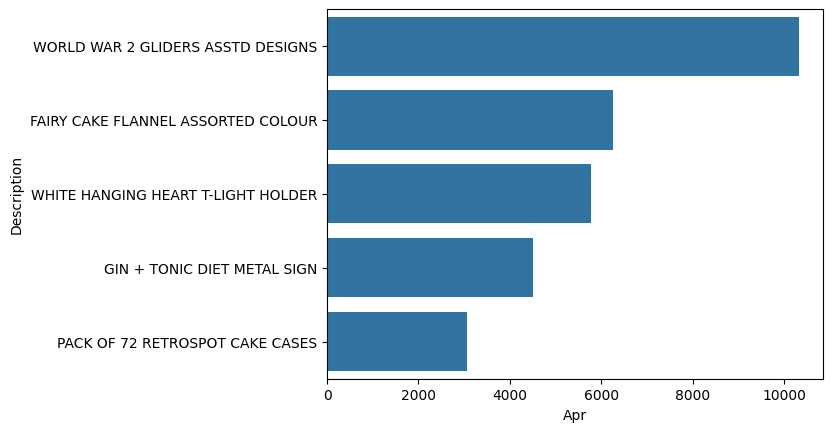

### May ###
InvoiceDate   May                         Description
StockCode                                            
22197        6850                      POPCORN HOLDER
84077        6005   WORLD WAR 2 GLIDERS ASSTD DESIGNS
15036        4684           ASSORTED COLOURS SILK FAN
47566B       4349              TEA TIME PARTY BUNTING
21977        4055  PACK OF 60 PINK PAISLEY CAKE CASES 




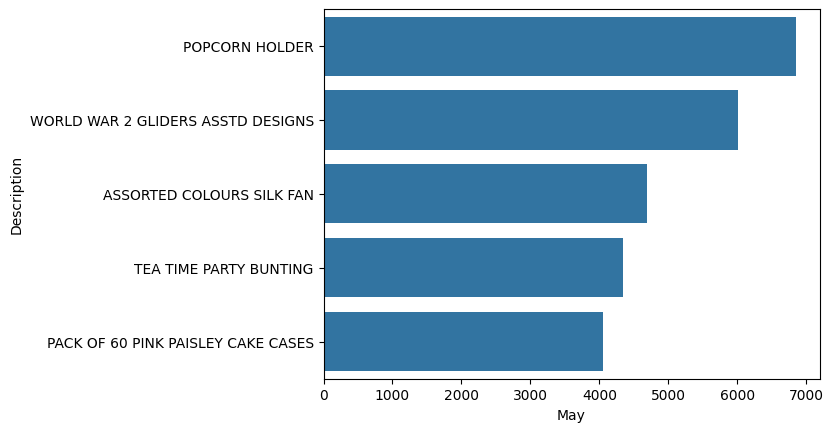

### Jun ###
InvoiceDate    Jun                         Description
StockCode                                             
23005        19426    TRAVEL CARD WALLET I LOVE LONDON
23003         9106     TRAVEL CARD WALLET VINTAGE ROSE
85123A        5695  WHITE HANGING HEART T-LIGHT HOLDER
85099B        3688             JUMBO BAG RED RETROSPOT
15036         3346           ASSORTED COLOURS SILK FAN 




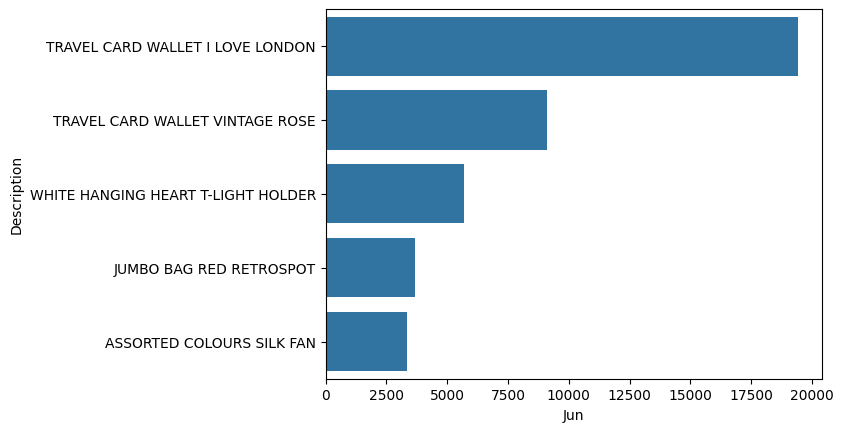

### Jul ###
InvoiceDate   Jul                          Description
StockCode                                             
18007        6041  ESSENTIAL BALM 3.5g TIN IN ENVELOPE
84568        5019       GIRLS ALPHABET IRON ON PATCHES
20713        4315                       JUMBO BAG OWLS
15036        4112            ASSORTED COLOURS SILK FAN
84077        3810    WORLD WAR 2 GLIDERS ASSTD DESIGNS 




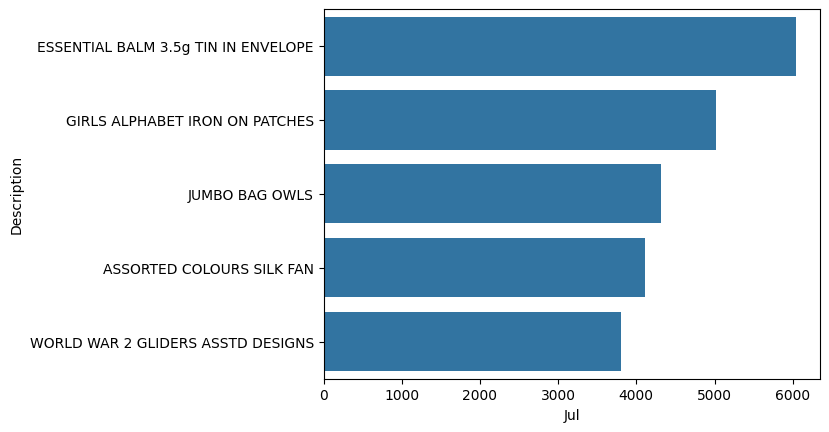

### Aug ###
InvoiceDate   Aug                    Description
StockCode                                       
84879        6554  ASSORTED COLOUR BIRD ORNAMENT
85099B       5603        JUMBO BAG RED RETROSPOT
22197        5426                 POPCORN HOLDER
23203        4308        JUMBO BAG VINTAGE DOILY
23199        3233               JUMBO BAG APPLES 




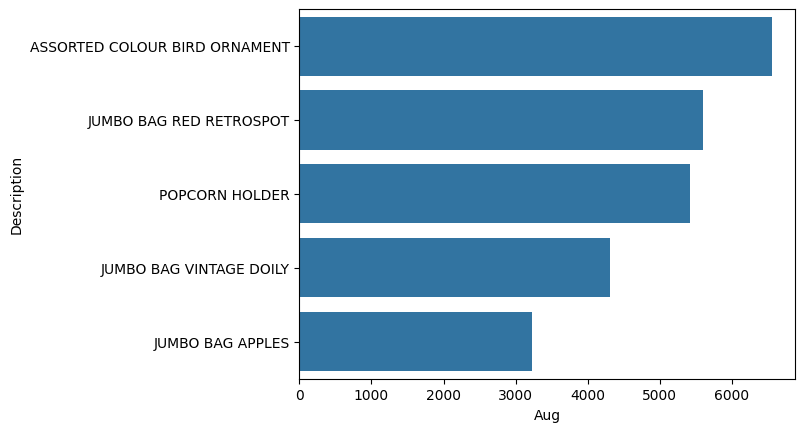

### Sep ###
InvoiceDate   Sep                      Description
StockCode                                         
16045        5067       POPART WOODEN PENCILS ASST
85099B       4535          JUMBO BAG RED RETROSPOT
22197        4239                   POPCORN HOLDER
22952        3711  60 CAKE CASES VINTAGE CHRISTMAS
16259        3623     PIECE OF CAMO STATIONERY SET 




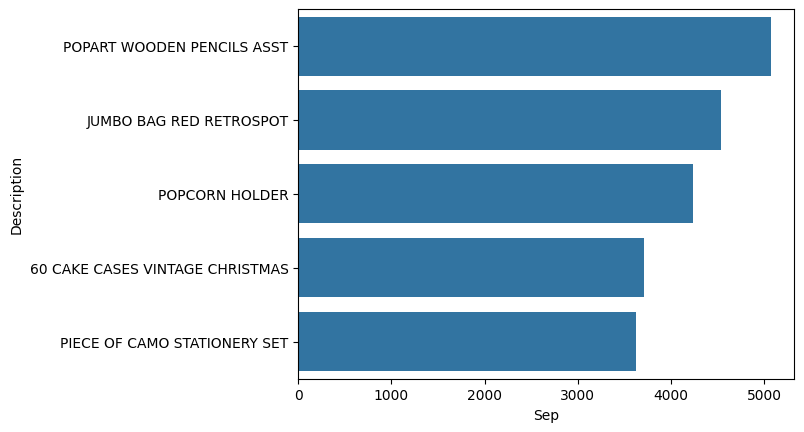

### Oct ###
InvoiceDate   Oct                        Description
StockCode                                           
84077        8180  WORLD WAR 2 GLIDERS ASSTD DESIGNS
20971        7466   PINK BLUE FELT CRAFT TRINKET BOX
23084        6352                 RABBIT NIGHT LIGHT
85099B       6021            JUMBO BAG RED RETROSPOT
22197        5949                     POPCORN HOLDER 




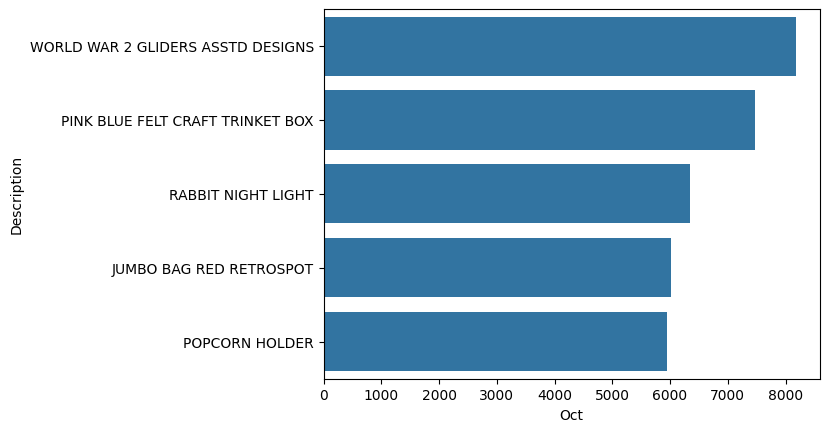

### Nov ###
InvoiceDate    Nov                     Description
StockCode                                         
23084        15025              RABBIT NIGHT LIGHT
22197        12761                  POPCORN HOLDER
84826        12551  ASSTD DESIGN 3D PAPER STICKERS
22086         7948  PAPER CHAIN KIT 50'S CHRISTMAS
85099B        6011         JUMBO BAG RED RETROSPOT 




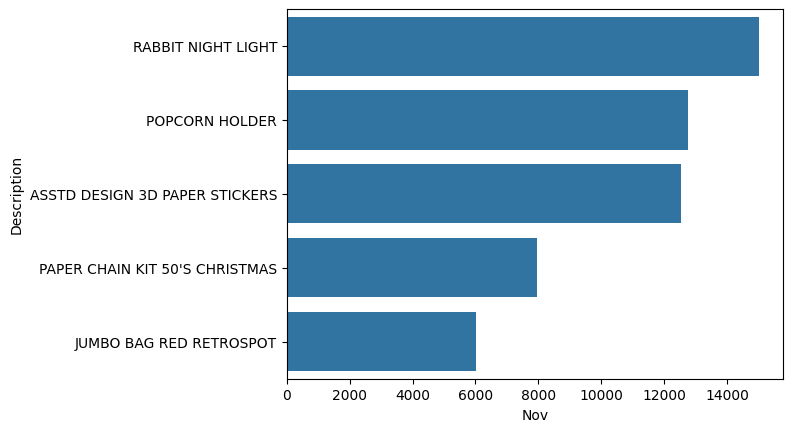

### Dec ###
InvoiceDate     Dec                          Description
StockCode                                               
23843        161990          PAPER CRAFT , LITTLE BIRDIE
84347         12606  ROTATING SILVER ANGELS T-LIGHT HLDR
22197          8981                       POPCORN HOLDER
84077          6562    WORLD WAR 2 GLIDERS ASSTD DESIGNS
85123A         5097   WHITE HANGING HEART T-LIGHT HOLDER 




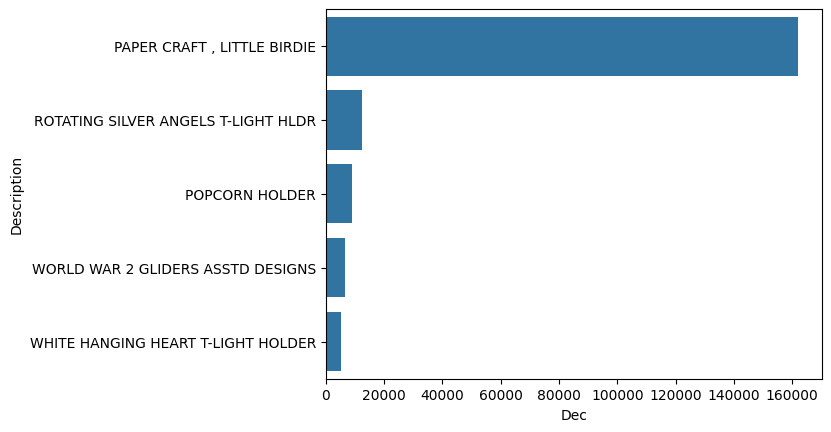

In [ ]:
for x in monthly_table.columns[:len(monthly_table.columns)-1]:
  print('### '+str(x+' ###'))
  print(monthly_table[[x , 'Description']].sort_values(by=x , ascending=False).head(5),'\n\n')
  xaxis=monthly_table[[x , 'Description']].sort_values(by=x , ascending=False).head(5)[x]
  yaxis=monthly_table[[x , 'Description']].sort_values(by=x , ascending=False).head(5)['Description']
  sns.barplot(x=xaxis , y=yaxis , data=monthly_table[[x , 'Description']].sort_values(by=x , ascending=False).head(5))
  plt.show()

In [ ]:
country_table=data.pivot_table(index='StockCode' , columns='Country' , values='Quantity',aggfunc=np.sum , fill_value=0)
country_table['Description']=country_table.index.map(stockdescriptions['Description'])

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified,Description
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0,0,0,0,0,0,0,0,0,0,...,0,0,24,0,12,0,0,621,0,INFLATABLE POLITICAL GLOBE
10080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,495,0,GROOVY CACTUS INFLATABLE
10120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,183,0,DOGGY RUBBER
10125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,20,0,0,686,0,MINI FUNKY DESIGN TAPES
10133,0,0,0,0,0,40,0,0,0,0,...,0,0,0,0,10,0,0,2829,0,COLOURING PENCILS BROWN TUBE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gift_0001_20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20,0,Dotcomgiftshop Gift Voucher �20.00
gift_0001_30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,37,0,Dotcomgiftshop Gift Voucher �30.00
gift_0001_40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,Dotcomgiftshop Gift Voucher �40.00


**### COUNTRY POPULARS ###**

### Australia ###
Country    Australia                    Description
StockCode                                          
22492           2988         MINI PAINT SET VINTAGE
23084           1884             RABBIT NIGHT LIGHT
21915           1704          RED  HARMONICA IN BOX
21731           1344  RED TOADSTOOL LED NIGHT LIGHT
22969           1166   HOMEMADE JAM SCENTED CANDLES 




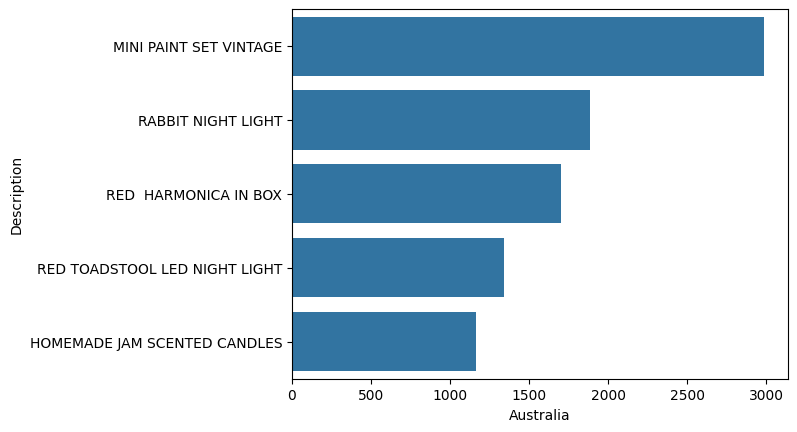

### Austria ###
Country    Austria                       Description
StockCode                                           
21918          288  SET 12 KIDS COLOUR  CHALK STICKS
22546          240                MINI JIGSAW PURDEY
22582          144      PACK OF 6 SWEETIE GIFT BOXES
22584          144    PACK OF 6 PANNETONE GIFT BOXES
22556           48     PLASTERS IN TIN CIRCUS PARADE 




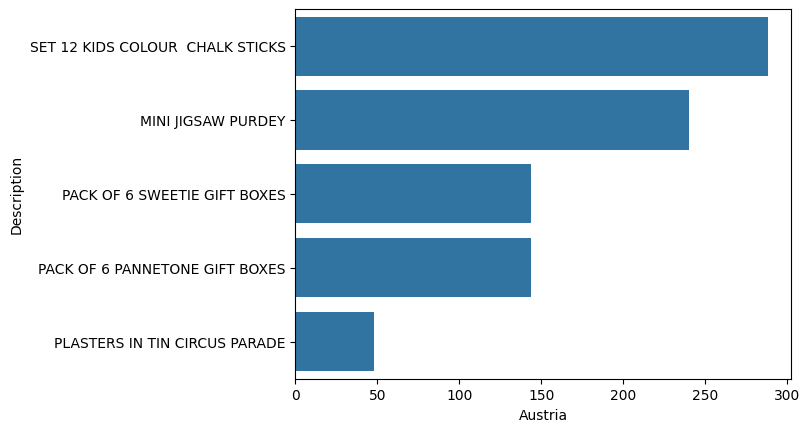

### Bahrain ###
Country    Bahrain                         Description
StockCode                                             
72802B         114  OCEAN SCENT CANDLE IN JEWELLED BOX
23076           96          ICE CREAM SUNDAE LIP GLOSS
23077           60                  DOUGHNUT LIP GLOSS
22693           24  GROW A FLYTRAP OR SUNFLOWER IN TIN
85040A          12     S/4 PINK FLOWER CANDLES IN BOWL 




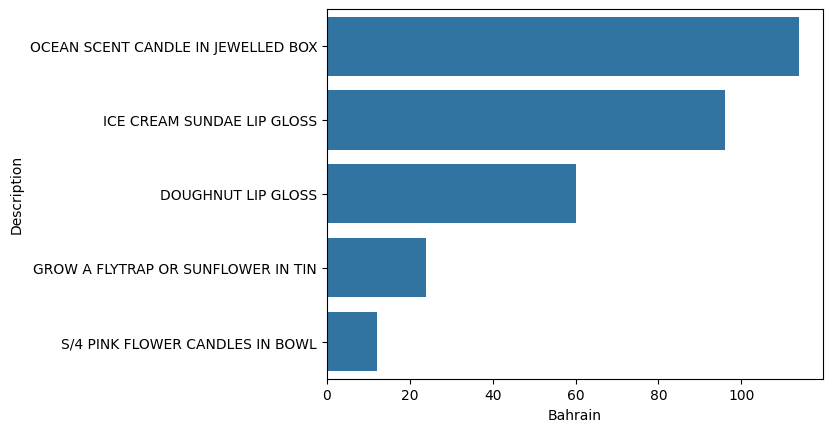

### Belgium ###
Country    Belgium                         Description
StockCode                                             
21212          480     PACK OF 72 RETROSPOT CAKE CASES
22326          420  ROUND SNACK BOXES SET OF4 WOODLAND
22417          384      PACK OF 60 SPACEBOY CAKE CASES
22629          341                  SPACEBOY LUNCH BOX
22630          341                DOLLY GIRL LUNCH BOX 




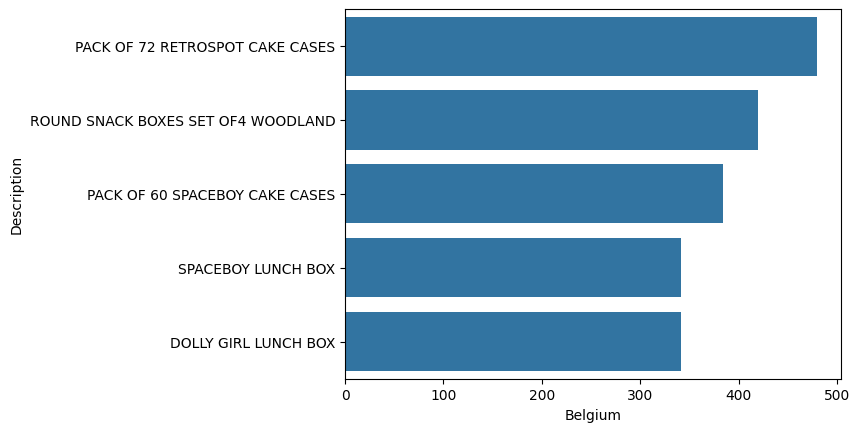

### Brazil ###
Country    Brazil                         Description
StockCode                                            
22699          24     ROSES REGENCY TEACUP AND SAUCER
21430          24  SET/3 RED GINGHAM ROSE STORAGE BOX
22993          24        SET OF 4 PANTRY JELLY MOULDS
22722          24   SET OF 6 SPICE TINS PANTRY DESIGN
84971S         24            SMALL HEART FLOWERS HOOK 




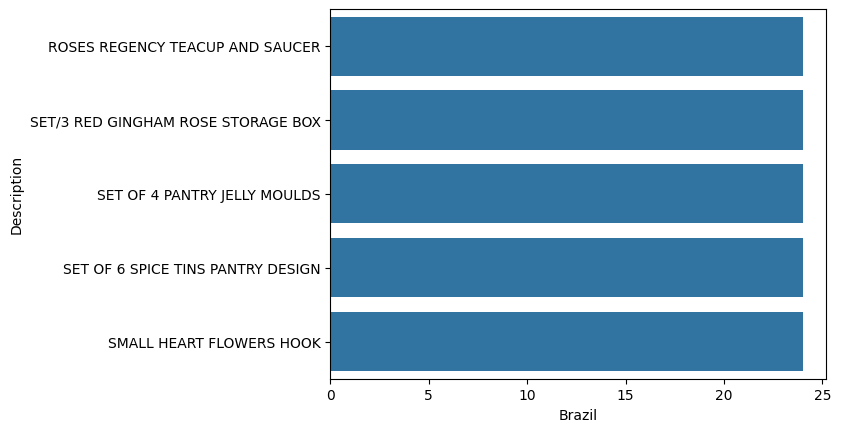

### Canada ###
Country    Canada                        Description
StockCode                                           
37370         504         RETRO COFFEE MUGS ASSORTED
84077         288  WORLD WAR 2 GLIDERS ASSTD DESIGNS
20727          50            LUNCH BAG  BLACK SKULL.
47593B         48              SCOTTIE DOGS BABY BIB
10133          40       COLOURING PENCILS BROWN TUBE 




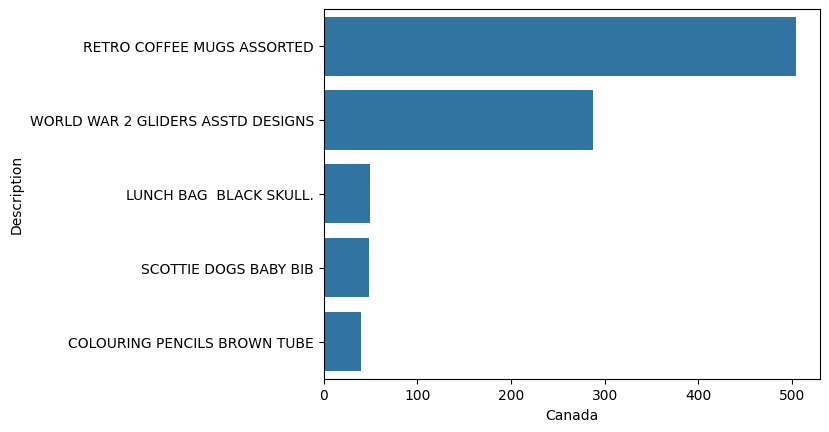

### Channel Islands ###
Country    Channel Islands                     Description
StockCode                                                 
21785                  407                     RAIN PONCHO
85099B                 250         JUMBO BAG RED RETROSPOT
85099C                 220  JUMBO  BAG BAROQUE BLACK WHITE
23199                  220                JUMBO BAG APPLES
22386                  200         JUMBO BAG PINK POLKADOT 




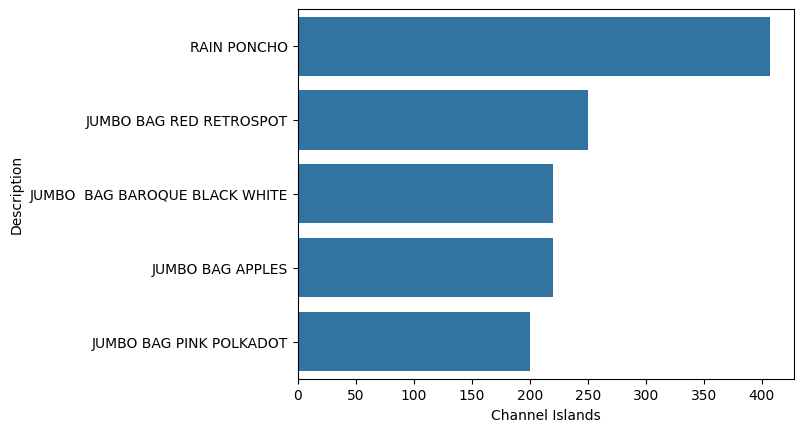

### Cyprus ###
Country    Cyprus                         Description
StockCode                                            
22335         384       HEART DECORATION PAINTED ZINC
84598         288       BOYS ALPHABET IRON ON PATCHES
84568         288      GIRLS ALPHABET IRON ON PATCHES
85123A        144  WHITE HANGING HEART T-LIGHT HOLDER
15056N         99           EDWARDIAN PARASOL NATURAL 




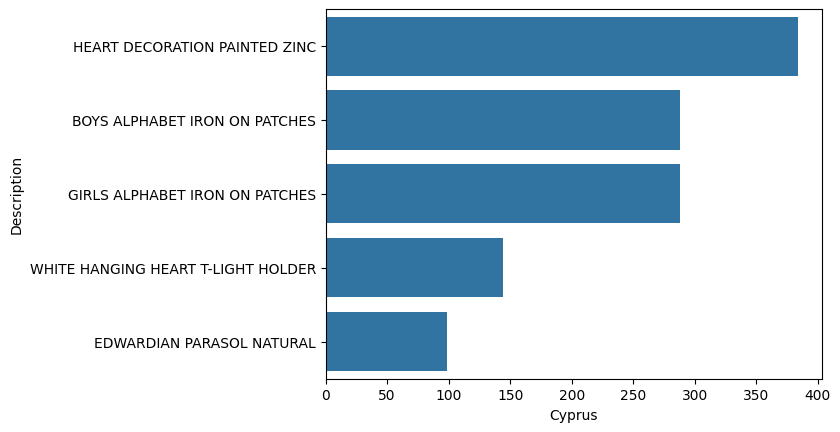

### Czech Republic ###
Country    Czech Republic                          Description
StockCode                                                     
84459A                 72             PINK METAL CHICKEN HEART
22579                  72   WOODEN TREE CHRISTMAS SCANDINAVIAN
22578                  72   WOODEN STAR CHRISTMAS SCANDINAVIAN
22231                  66           JIGSAW TREE WITH BIRDHOUSE
23271                  48  CHRISTMAS TABLE SILVER CANDLE SPIKE 




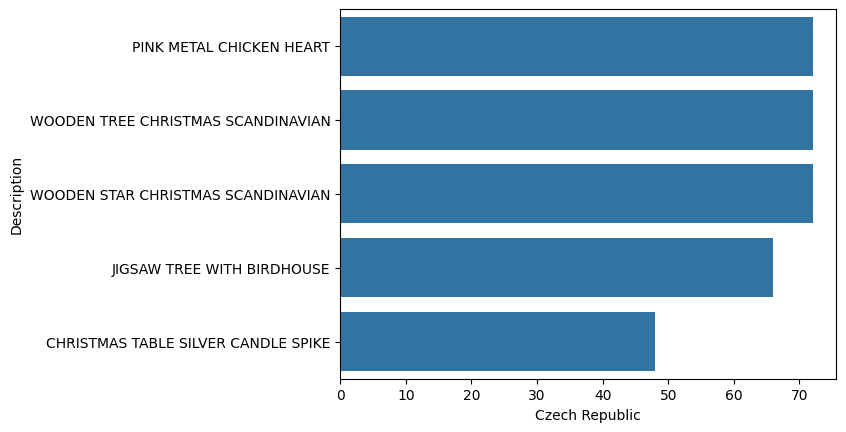

### Denmark ###
Country    Denmark                       Description
StockCode                                           
21915          288             RED  HARMONICA IN BOX
23296          280    SET OF 6 TEA TIME BAKING CASES
22467          270                 GUMBALL COAT RACK
23295          256  SET OF 12 MINI LOAF BAKING CASES
22630          160              DOLLY GIRL LUNCH BOX 




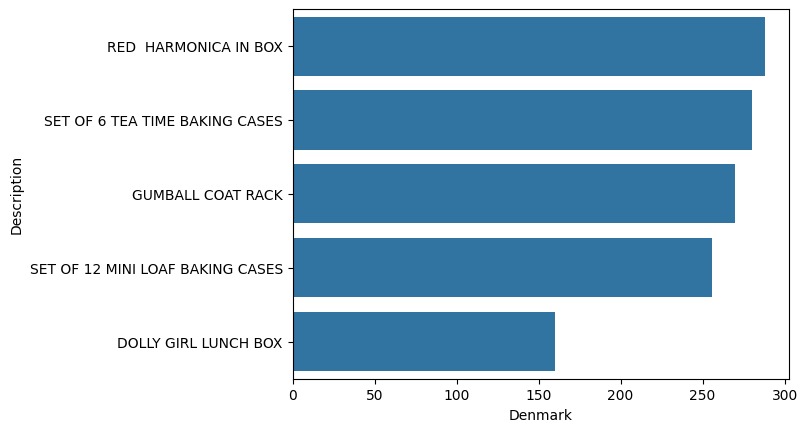

### EIRE ###
Country    EIRE                      Description
StockCode                                       
22197      1895                   POPCORN HOLDER
21212      1872  PACK OF 72 RETROSPOT CAKE CASES
22952      1680  60 CAKE CASES VINTAGE CHRISTMAS
22950      1644     36 DOILIES VINTAGE CHRISTMAS
84991      1536      60 TEATIME FAIRY CAKE CASES 




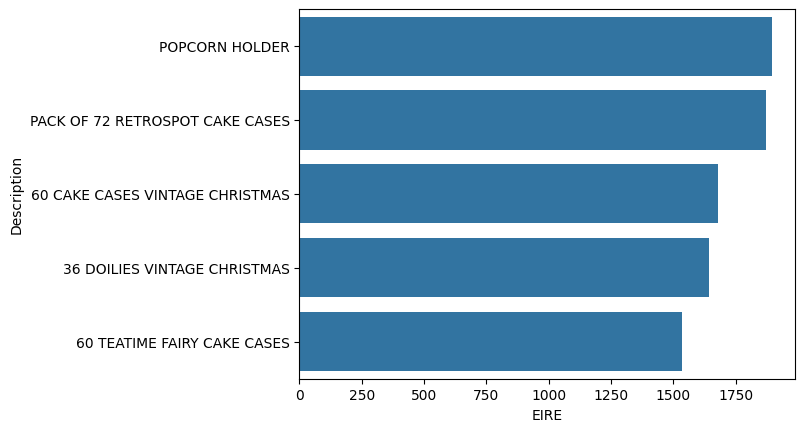

### European Community ###
Country    European Community                         Description
StockCode                                                        
22572                      24       ROCKING HORSE GREEN CHRISTMAS
22571                      24         ROCKING HORSE RED CHRISTMAS
23308                      24   SET OF 60 VINTAGE LEAF CAKE CASES
23307                      24  SET OF 60 PANTRY DESIGN CAKE CASES
23210                      24    WHITE ROCKING HORSE HAND PAINTED 




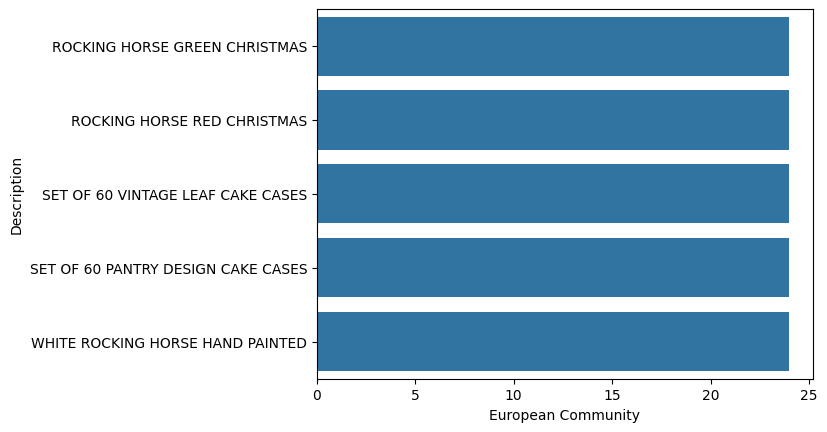

### Finland ###
Country    Finland                       Description
StockCode                                           
84997D         552   CHILDRENS CUTLERY POLKADOT PINK
84997C         348   CHILDRENS CUTLERY POLKADOT BLUE
84997A         232  CHILDRENS CUTLERY POLKADOT GREEN
23077          200                DOUGHNUT LIP GLOSS
84991          192       60 TEATIME FAIRY CAKE CASES 




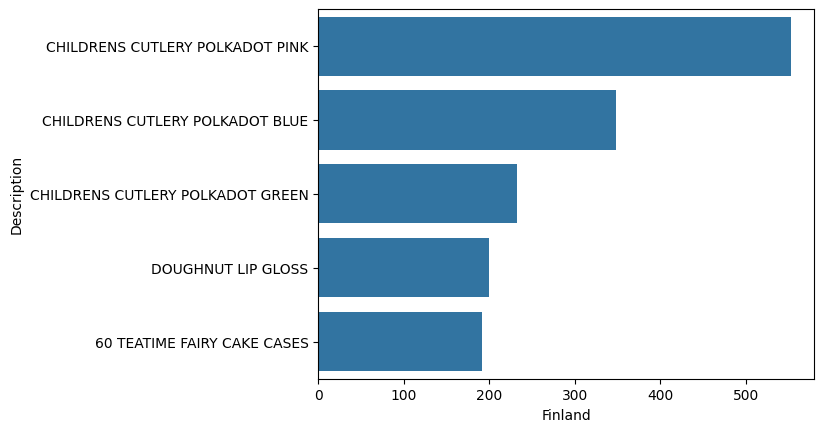

### France ###
Country    France                    Description
StockCode                                       
23084        4025             RABBIT NIGHT LIGHT
22492        2196         MINI PAINT SET VINTAGE
21731        1316  RED TOADSTOOL LED NIGHT LIGHT
21086        1272    SET/6 RED SPOTTY PAPER CUPS
84879        1204  ASSORTED COLOUR BIRD ORNAMENT 




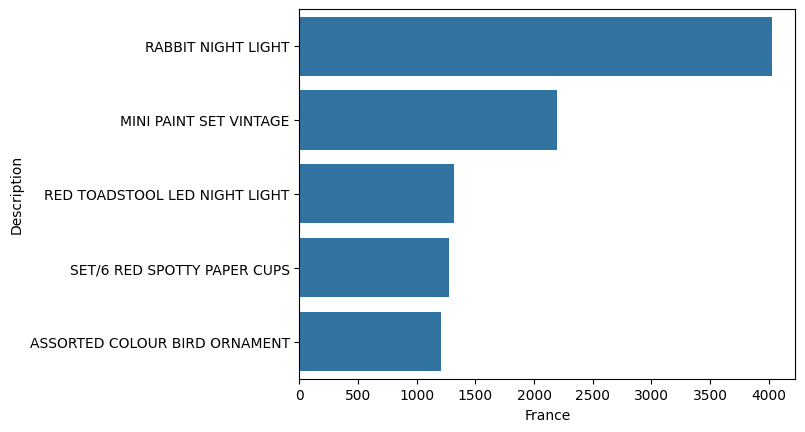

### Germany ###
Country    Germany                         Description
StockCode                                             
22326         1248  ROUND SNACK BOXES SET OF4 WOODLAND
15036         1164           ASSORTED COLOURS SILK FAN
POST          1124                             POSTAGE
20719         1021              WOODLAND CHARLOTTE BAG
21212         1002     PACK OF 72 RETROSPOT CAKE CASES 




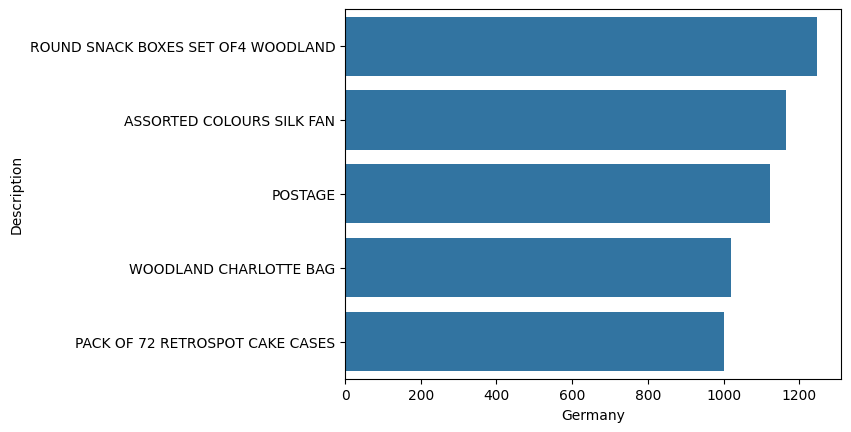

### Greece ###
Country    Greece                          Description
StockCode                                             
21616          48      4 PEAR BOTANICAL DINNER CANDLES
21615          48  4 LAVENDER BOTANICAL DINNER CANDLES
22604          32       SET OF 4 NAPKIN CHARMS CUTLERY
21700          24          BIG DOUGHNUT FRIDGE MAGNETS
22957          24  SET 3 PAPER VINTAGE CHICK PAPER EGG 




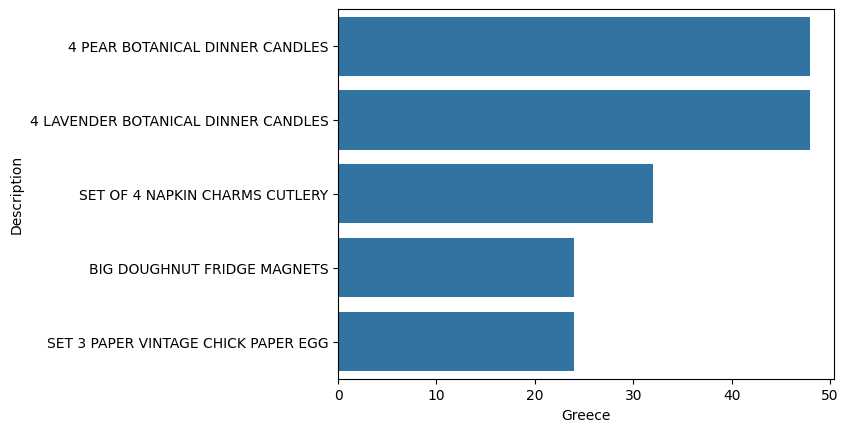

### Hong Kong ###
Country    Hong Kong                         Description
StockCode                                               
22326            150  ROUND SNACK BOXES SET OF4 WOODLAND
84077            144   WORLD WAR 2 GLIDERS ASSTD DESIGNS
20675            120                  BLUE POLKADOT BOWL
84997D           120     CHILDRENS CUTLERY POLKADOT PINK
20677            120                  PINK POLKADOT BOWL 




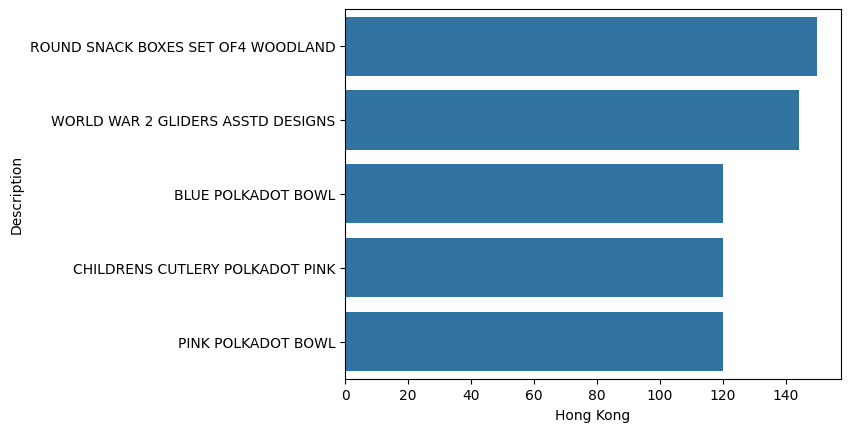

### Iceland ###
Country    Iceland                     Description
StockCode                                         
23076          240      ICE CREAM SUNDAE LIP GLOSS
84558A         126    3D DOG PICTURE PLAYING CARDS
22492          108          MINI PAINT SET VINTAGE
23084           84              RABBIT NIGHT LIGHT
84992           72  72 SWEETHEART FAIRY CAKE CASES 




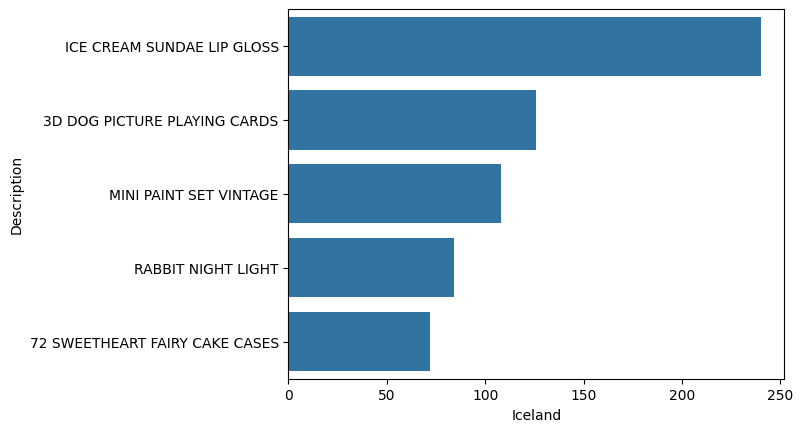

### Israel ###
Country    Israel                         Description
StockCode                                            
20719         130              WOODLAND CHARLOTTE BAG
20724         110         RED RETROSPOT CHARLOTTE BAG
21669          96     BLUE STRIPE CERAMIC DRAWER KNOB
22326          96  ROUND SNACK BOXES SET OF4 WOODLAND
23170          72             REGENCY TEA PLATE ROSES 




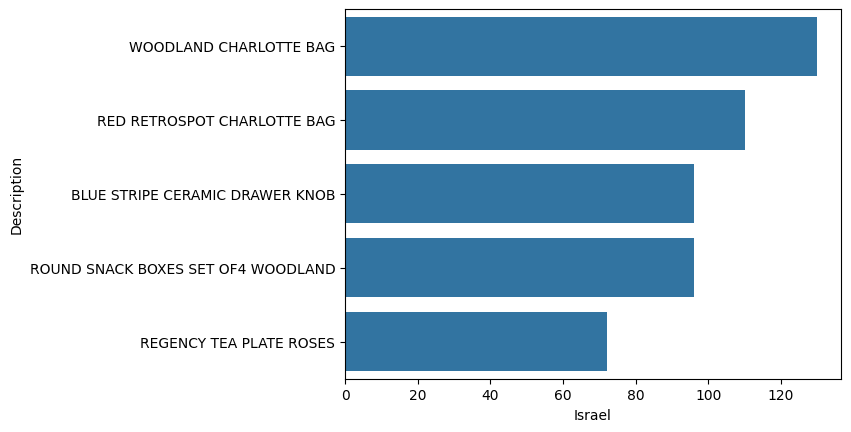

### Italy ###
Country    Italy             Description
StockCode                               
51014A       240    FEATHER PEN,HOT PINK
23445        200       ICE CREAM BUBBLES
51014C       168  FEATHER PEN,COAL BLACK
22197        160          POPCORN HOLDER
51014L       120  FEATHER PEN,LIGHT PINK 




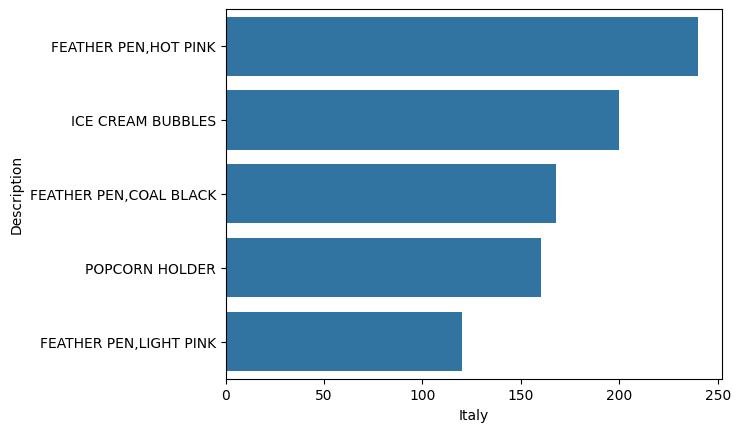

### Japan ###
Country    Japan                        Description
StockCode                                          
23084       3415                 RABBIT NIGHT LIGHT
22328       2118  ROUND SNACK BOXES SET OF 4 FRUITS
22489       1201     PACK OF 12 TRADITIONAL CRAYONS
84077        577  WORLD WAR 2 GLIDERS ASSTD DESIGNS
22531        577  MAGIC DRAWING SLATE CIRCUS PARADE 




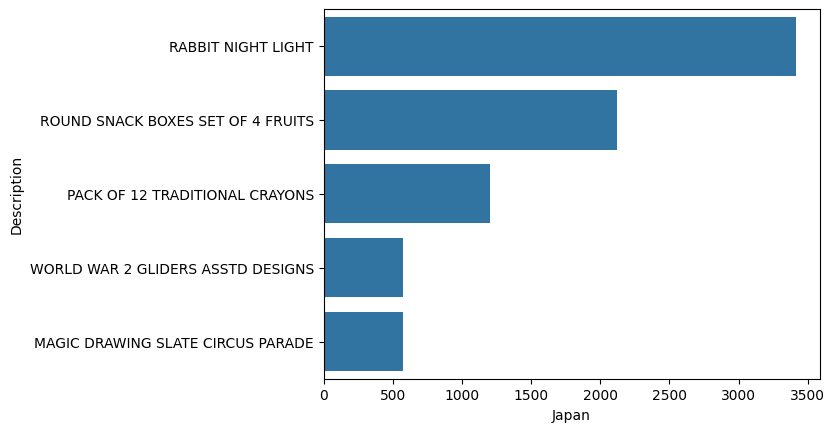

### Lebanon ###
Country    Lebanon                         Description
StockCode                                             
84929           24  ASSTD FRUIT+FLOWERS FRIDGE MAGNETS
47566           15                       PARTY BUNTING
21165           12        BEWARE OF THE CAT METAL SIGN
22720           12    SET OF 3 CAKE TINS PANTRY DESIGN
22722           12   SET OF 6 SPICE TINS PANTRY DESIGN 




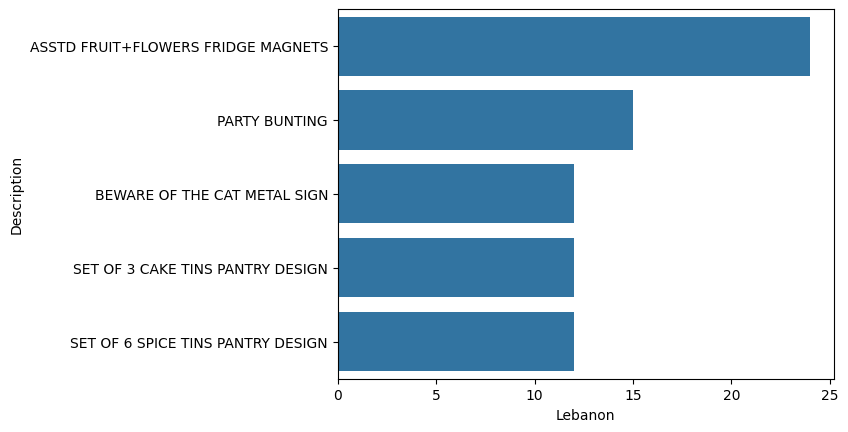

### Lithuania ###
Country    Lithuania                         Description
StockCode                                               
22271             48                FELTCRAFT DOLL ROSIE
21915             48               RED  HARMONICA IN BOX
20967             36  GREY FLORAL FELTCRAFT SHOULDER BAG
22306             36  SILVER MUG BONE CHINA TREE OF LIFE
21914             36               BLUE HARMONICA IN BOX 




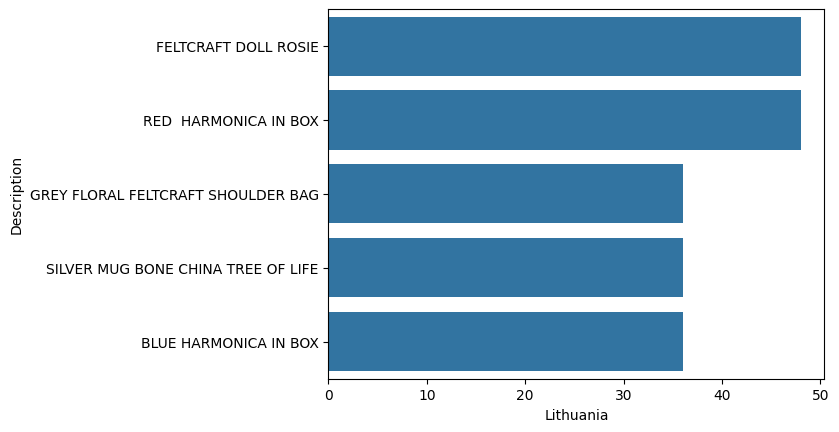

### Malta ###
Country    Malta                       Description
StockCode                                         
72741         87             GRAND CHOCOLATECANDLE
22065         64     CHRISTMAS PUDDING TRINKET POT
22307         26  GOLD MUG BONE CHINA TREE OF LIFE
85034C        26       3 ROSE MORRIS BOXED CANDLES
22959         25            WRAP CHRISTMAS VILLAGE 




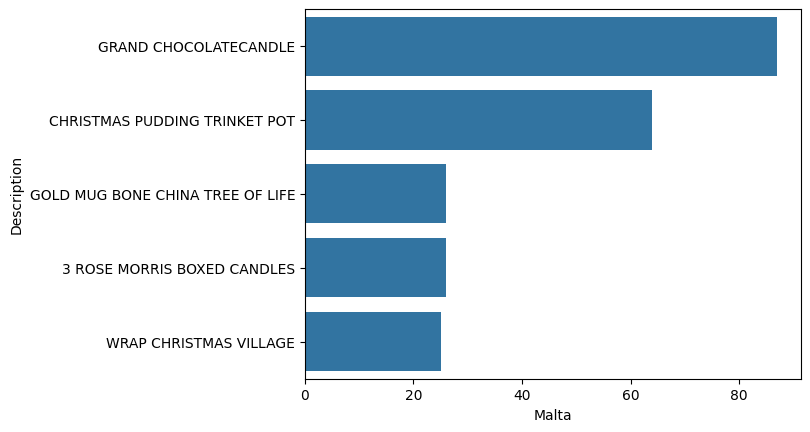

### Netherlands ###
Country    Netherlands                         Description
StockCode                                                 
23084             4801                  RABBIT NIGHT LIGHT
22629             4528                  SPACEBOY LUNCH BOX
22630             4132                DOLLY GIRL LUNCH BOX
21212             4128     PACK OF 72 RETROSPOT CAKE CASES
22326             3132  ROUND SNACK BOXES SET OF4 WOODLAND 




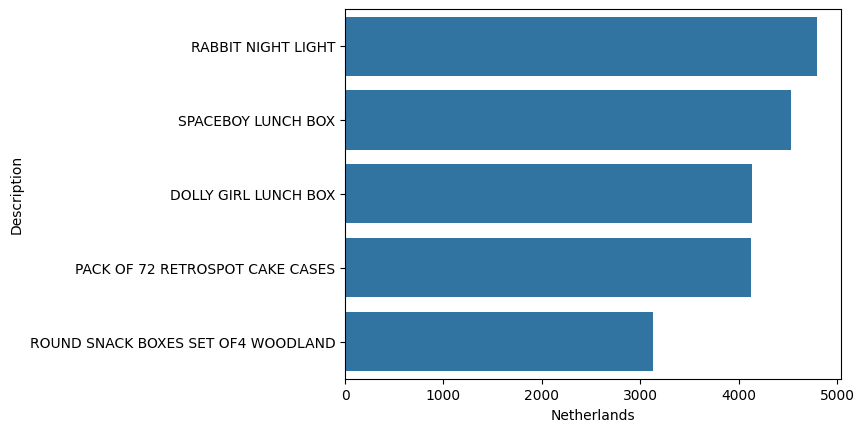

### Norway ###
Country    Norway                          Description
StockCode                                             
16008         576  SMALL FOLDING SCISSOR(POINTED EDGE)
22693         504   GROW A FLYTRAP OR SUNFLOWER IN TIN
22197         444                       POPCORN HOLDER
72232         384              FENG SHUI PILLAR CANDLE
84050         264      PINK HEART SHAPE EGG FRYING PAN 




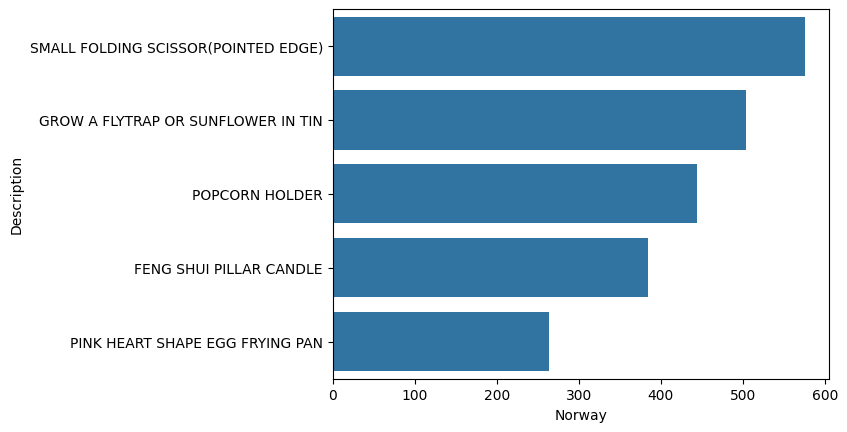

### Poland ###
Country    Poland                      Description
StockCode                                         
21232         168   STRAWBERRY CERAMIC TRINKET BOX
37448         150  CERAMIC CAKE DESIGN SPOTTED MUG
22961         108           JAM MAKING SET PRINTED
16016         100      LARGE CHINESE STYLE SCISSOR
22059          96    CERAMIC STRAWBERRY DESIGN MUG 




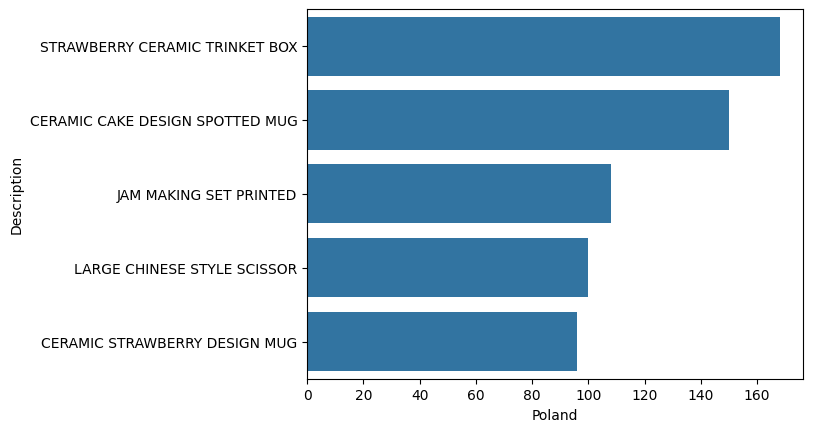

### Portugal ###
Country    Portugal                        Description
StockCode                                             
22740           240                       POLKADOT PEN
84991           218        60 TEATIME FAIRY CAKE CASES
20725           215            LUNCH BAG RED RETROSPOT
22383           193              LUNCH BAG SUKI DESIGN
22411           190  JUMBO SHOPPER VINTAGE RED PAISLEY 




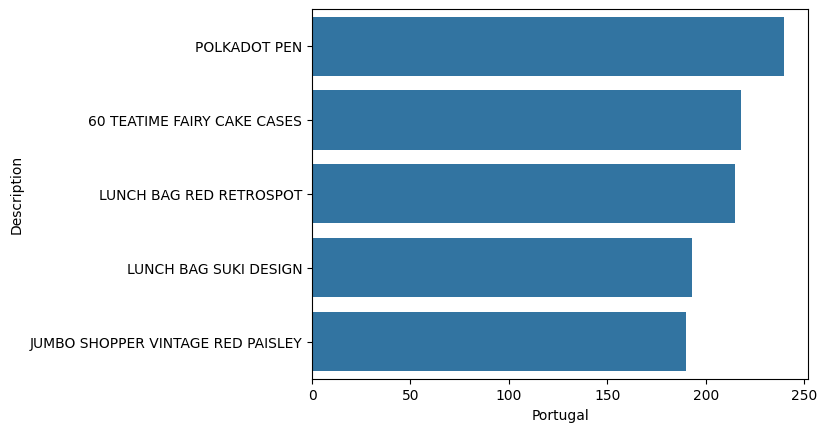

### RSA ###
Country    RSA                    Description
StockCode                                    
21889       12         WOODEN BOX OF DOMINOES
84375       12  SET OF 20 KIDS COOKIE CUTTERS
22585       12      PACK OF 6 BIRDY GIFT TAGS
22915       12   ASSORTED BOTTLE TOP  MAGNETS
22620       12    4 TRADITIONAL SPINNING TOPS 




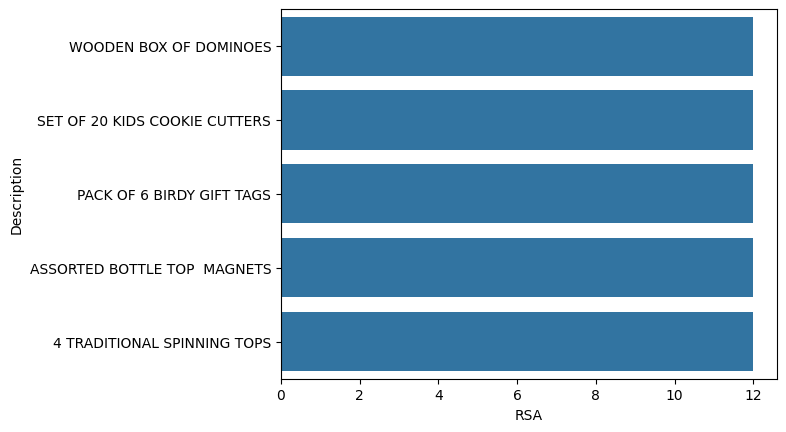

### Saudi Arabia ###
Country    Saudi Arabia                    Description
StockCode                                             
22556                12  PLASTERS IN TIN CIRCUS PARADE
22555                12      PLASTERS IN TIN STRONGMAN
22553                12         PLASTERS IN TIN SKULLS
22915                12   ASSORTED BOTTLE TOP  MAGNETS
22969                12   HOMEMADE JAM SCENTED CANDLES 




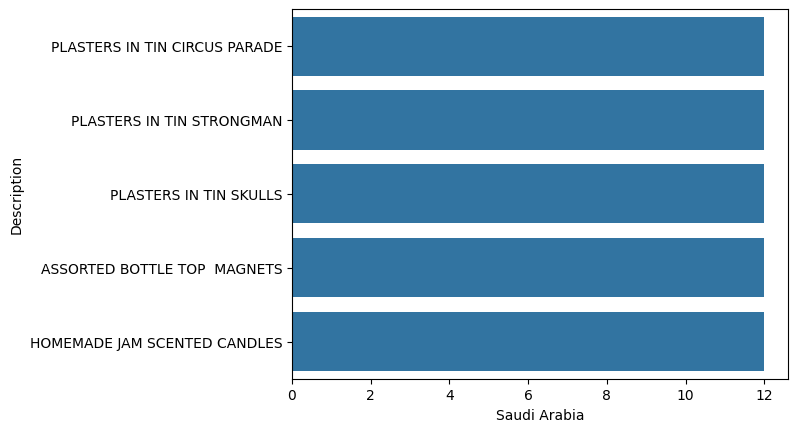

### Singapore ###
Country    Singapore                      Description
StockCode                                            
22339            384      CHRISTMAS TREE PAINTED ZINC
22197            300                   POPCORN HOLDER
22343            240   PARTY PIZZA DISH RED RETROSPOT
21519            144   GIN & TONIC DIET GREETING CARD
22346             96  PARTY PIZZA DISH GREEN POLKADOT 




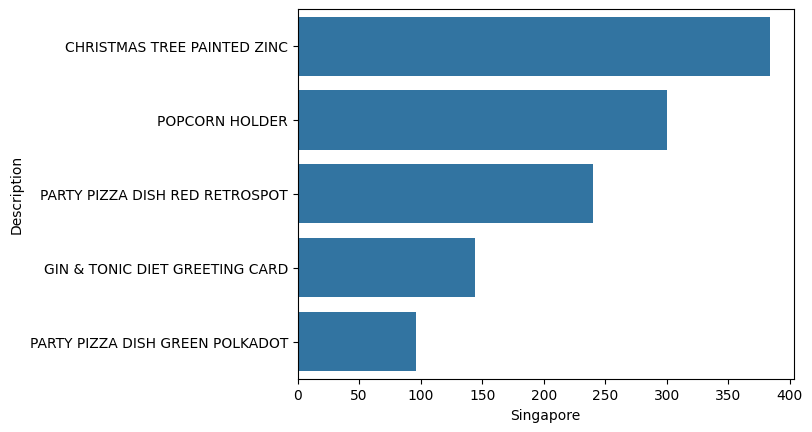

### Spain ###
Country    Spain                        Description
StockCode                                          
84997D      1089    CHILDRENS CUTLERY POLKADOT PINK
84997C      1013    CHILDRENS CUTLERY POLKADOT BLUE
72802C       576  VANILLA SCENT CANDLE JEWELLED BOX
20728        558                LUNCH BAG CARS BLUE
84879        417      ASSORTED COLOUR BIRD ORNAMENT 




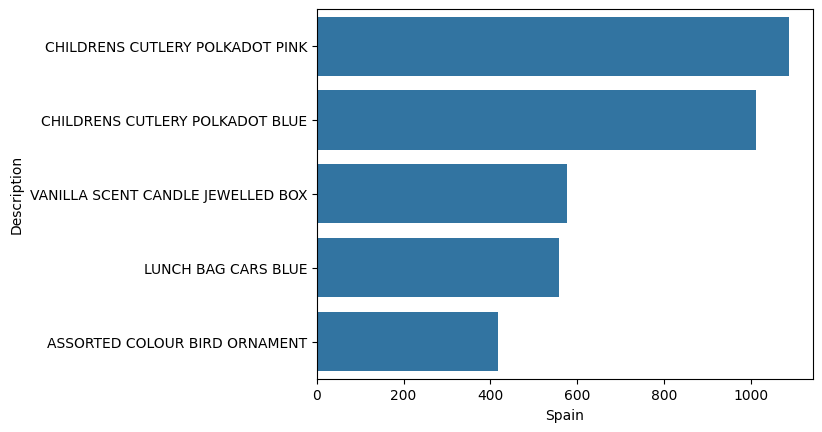

### Sweden ###
Country    Sweden                         Description
StockCode                                            
22492        2916              MINI PAINT SET VINTAGE
84077        2304   WORLD WAR 2 GLIDERS ASSTD DESIGNS
23310        1080             BUBBLEGUM RING ASSORTED
21977         984  PACK OF 60 PINK PAISLEY CAKE CASES
21212         984     PACK OF 72 RETROSPOT CAKE CASES 




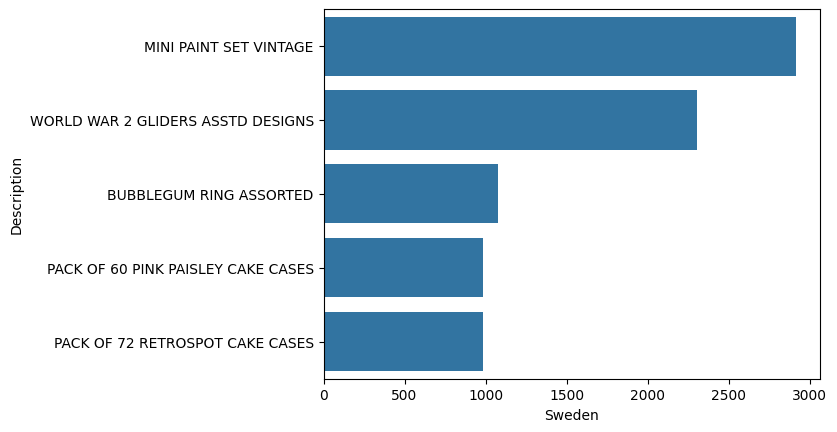

### Switzerland ###
Country    Switzerland                         Description
StockCode                                                 
22554              639    PLASTERS IN TIN WOODLAND ANIMALS
22326              481  ROUND SNACK BOXES SET OF4 WOODLAND
22551              469            PLASTERS IN TIN SPACEBOY
21212              432     PACK OF 72 RETROSPOT CAKE CASES
23199              370                    JUMBO BAG APPLES 




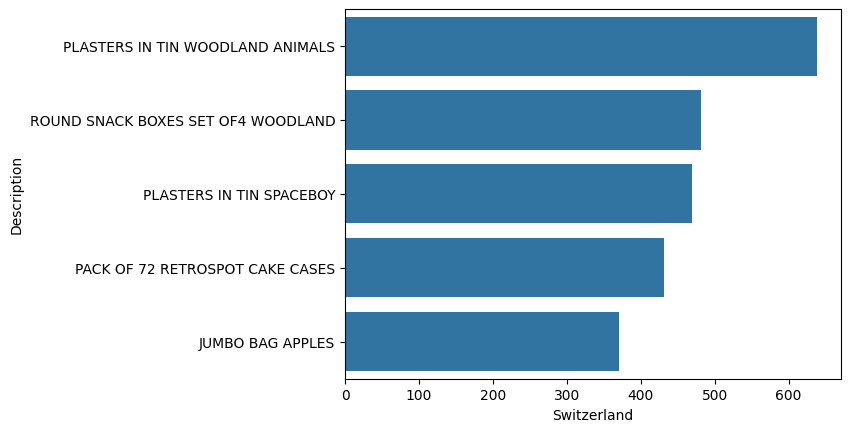

### USA ###
Country    USA                          Description
StockCode                                          
21121       96    SET/10 RED POLKADOT PARTY CANDLES
21122       96   SET/10 PINK POLKADOT PARTY CANDLES
21123       96  SET/10 IVORY POLKADOT PARTY CANDLES
21124       96   SET/10 BLUE POLKADOT PARTY CANDLES
23366       88       SET 12 COLOURING PENCILS DOILY 




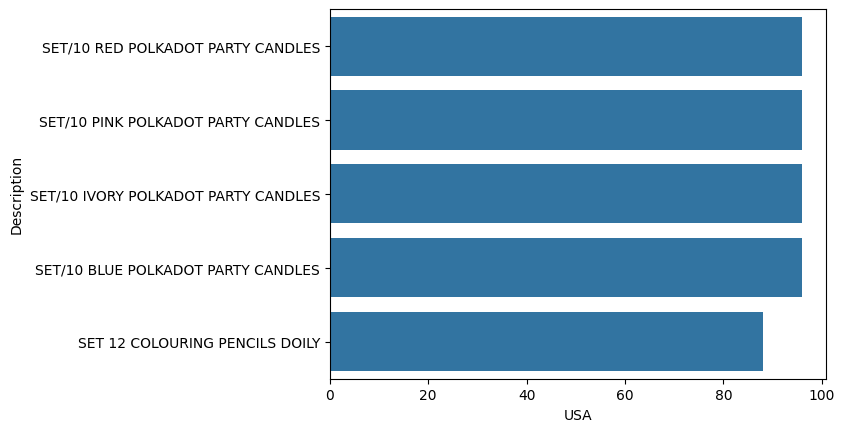

### United Arab Emirates ###
Country    United Arab Emirates                     Description
StockCode                                                      
85215                        72  ASSORTED CHEESE FRIDGE MAGNETS
21700                        72     BIG DOUGHNUT FRIDGE MAGNETS
22492                        36          MINI PAINT SET VINTAGE
22092                        36         BLUE PAISLEY TISSUE BOX
23231                        25              WRAP DOILEY DESIGN 




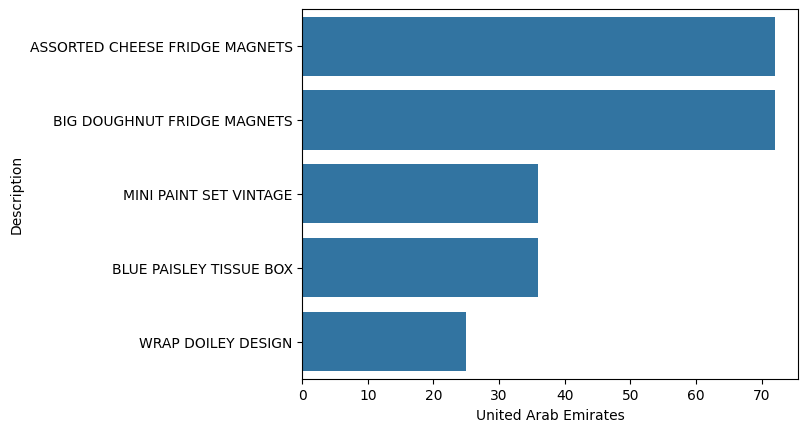

### United Kingdom ###
Country    United Kingdom                        Description
StockCode                                                   
23843              161990        PAPER CRAFT , LITTLE BIRDIE
23166              151503     MEDIUM CERAMIC TOP STORAGE JAR
22197               53758                     POPCORN HOLDER
84077               50726  WORLD WAR 2 GLIDERS ASSTD DESIGNS
85099B              45369            JUMBO BAG RED RETROSPOT 




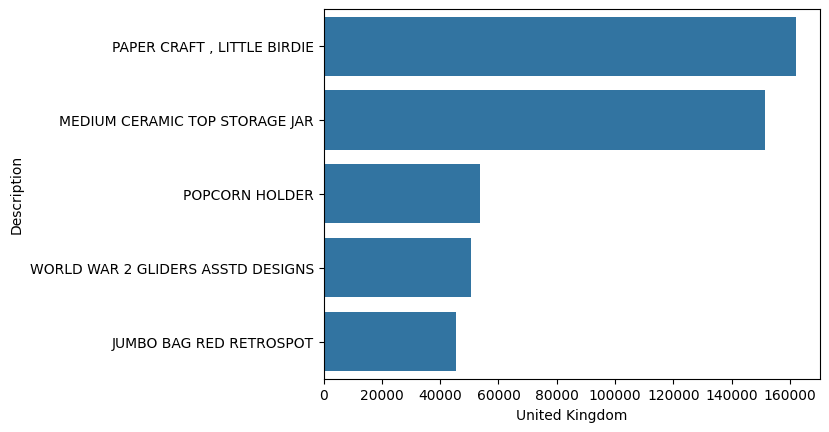

### Unspecified ###
Country    Unspecified                         Description
StockCode                                                 
84077               96   WORLD WAR 2 GLIDERS ASSTD DESIGNS
47021G              48  SET/6 BEAD COASTERS GAUZE BAG GOLD
23076               48          ICE CREAM SUNDAE LIP GLOSS
84992               48      72 SWEETHEART FAIRY CAKE CASES
22439               40                   6 ROCKET BALLOONS 




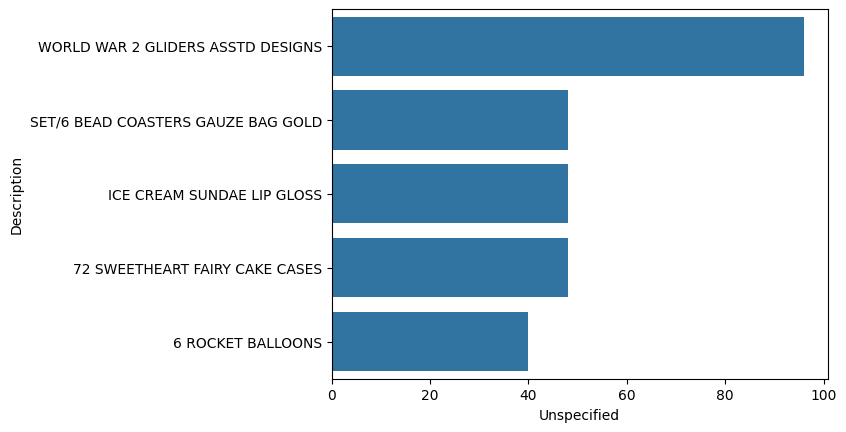

In [ ]:
for x in country_table.columns[:len(country_table.columns)-1]:
  print('### '+str(x+' ###'))
  print(country_table[[x , 'Description']].sort_values(by=x , ascending=False).head(5),'\n\n')
  xaxis = country_table[[x , 'Description']].sort_values(by=x , ascending=False).head(5)[x]
  yaxis = country_table[[x , 'Description']].sort_values(by=x , ascending=False).head(5)['Description']
  sns.barplot(x=xaxis , y=yaxis , data=country_table[[x , 'Description']].sort_values(by=x , ascending=False).head(5))
  plt.show()

**OPTIMIZATION OF KMEANS**

In [ ]:
import matplotlib.pyplot as plt
def optimize_k_means(data, max_k ,iter=20):
    means=[]
    inertias=[]

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k , init='k-means++' , n_init=iter)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

**CLUSTERING OF DATA**

In [ ]:
pivot_table=data.pivot_table(index='CustomerID' , columns='StockCode' , values='Quantity',aggfunc=np.sum).fillna(0)
pivot_table.values[pivot_table.values > 0] = 1
pivot_table.columns=pivot_table.columns.astype(str)

In [ ]:
pivot_table.shape

(8082, 4070)

In [ ]:
pivot_table

StockCode,10002,10080,10120,10125,10133,10134,10135,11001,15030,15034,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23706.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23707.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**USING PCA ANALYSIS**

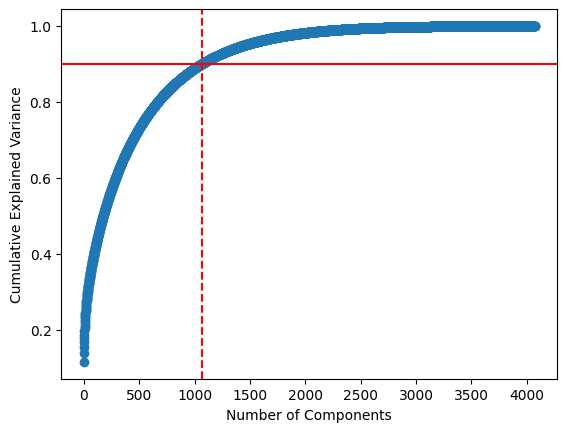

In [ ]:
pca = PCA()
pca.fit(pivot_table)
explained_variance=pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.plot(range(1,len(explained_variance)+1) , cumulative_explained_variance , marker='o' , linestyle='--')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9 , color='r' , linestyle='-')
plt.axvline(x=np.argmax(cumulative_explained_variance >= 0.9) + 1 , color='r' , linestyle='--')
plt.show()

In [ ]:
ppca=PCA(n_components=1000)
inputdata=ppca.fit_transform(pivot_table)

In [ ]:
inputdata.shape

(8082, 1000)

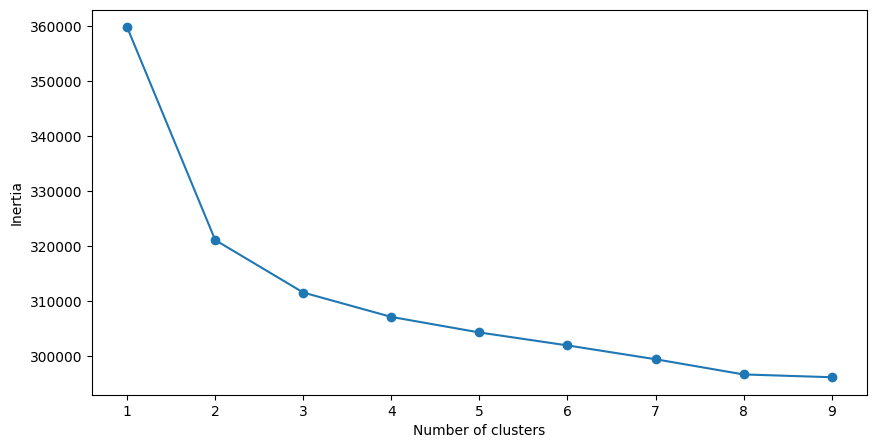

In [ ]:
optimize_k_means(inputdata , 10)

In [ ]:
tkmeans=KMeans(n_clusters=3 , init='k-means++' , n_init=100)
tkmeans.fit(inputdata)
tlabels=tkmeans.labels_

In [ ]:
pivot_table['Cluster_Labels']=tlabels

In [ ]:
for x in range(3):
  print(len(tlabels[tlabels == x]))
x=st.mode(tlabels)

1247
6724
111


In [ ]:
table=pivot_table[pivot_table.Cluster_Labels == x]

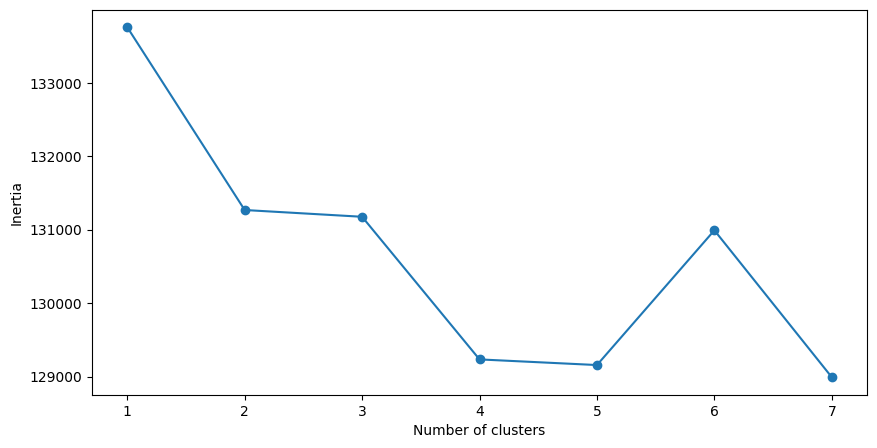

In [ ]:
optimize_k_means(table , 8)

In [ ]:
skmeans=KMeans(n_clusters=3 , init='k-means++' , n_init=100)
skmeans.fit(table)
slabels=skmeans.labels_+3

In [ ]:
table['Cluster_Labels'] = slabels

<ipython-input-152-14fc5e9ec18a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Cluster_Labels'] = slabels


In [ ]:
pivot_table.Cluster_Labels[pivot_table.Cluster_Labels == x] = slabels

<ipython-input-147-e8df40510d26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_table.Cluster_Labels[pivot_table.Cluster_Labels == x] = slabels


In [ ]:
for x in range(3,6):
  print(len(slabels[slabels == x]))
y=st.mode(slabels)

1580
4900
244


In [ ]:
table1=table[table.Cluster_Labels == y]

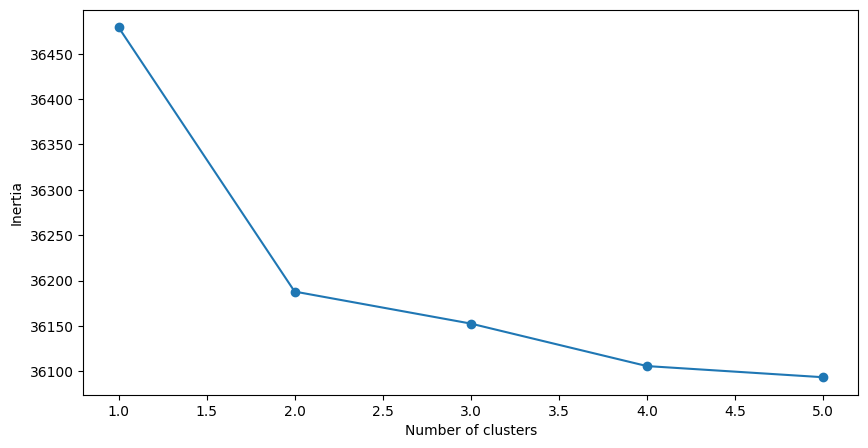

In [ ]:
optimize_k_means(table1 , 6)

In [ ]:
s1kmeans=KMeans(n_clusters=2 , init='k-means++' , n_init=100)
s1kmeans.fit(table1)
s1labels=s1kmeans.labels_+6

In [ ]:
pivot_table.Cluster_Labels[pivot_table.Cluster_Labels == y] = s1labels

<ipython-input-157-20fb36d1af58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_table.Cluster_Labels[pivot_table.Cluster_Labels == y] = s1labels


In [ ]:
for x in range(6,8):
  print(len(s1labels[s1labels == x]))

1257
3643


In [ ]:
pivot_table['Cluster_Labels'].unique()

array([7, 3, 6, 0, 2, 5], dtype=int32)

In [ ]:
customer_clusters = pd.DataFrame({
    'CCustomerID': pivot_table.index,
    'Cluster_Labels': pivot_table['Cluster_Labels']
})

**MERGING THE CLUSTER LABELS WITH MAIN DATA FRAME(data)**

In [ ]:
data_with_clusters = pd.merge(data , customer_clusters , on='CustomerID')
data_with_clusters.drop(['CCustomerID'] , axis=1 , inplace=True)
data_with_clusters.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster_Labels
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,6
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,6
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6


In [ ]:
stock_cluster_aggregation=data_with_clusters.groupby(by=['Cluster_Labels','StockCode']).agg({'Quantity':'sum' , 'UnitPrice':'mean'}).reset_index()
stock_cluster_aggregation['Total_sales'] = stock_cluster_aggregation['Quantity'] * stock_cluster_aggregation['UnitPrice']


In [ ]:
sorteddata=stock_cluster_aggregation.sort_values(by=['Cluster_Labels','Total_sales'], ascending=False)
sorteddata['Description'] = sorteddata['StockCode'].map(stockdescriptions['Description'])
sorteddata

,Cluster_Labels,StockCode,Quantity,UnitPrice,Total_sales,Description
17541,7,M,2413,776.593944,1.873921e+06,Manual
16503,7,23843,161990,2.080000,3.369392e+05,"PAPER CRAFT , LITTLE BIRDIE"
17523,7,AMAZONFEE,34,7324.784706,2.490427e+05,AMAZON FEE
16200,7,23166,148564,1.180000,1.753055e+05,MEDIUM CERAMIC TOP STORAGE JAR
17542,7,POST,3490,21.718774,7.579852e+04,POSTAGE
...,...,...,...,...,...,...
3054,0,79157V,1,0.850000,8.500000e-01,UBO-LIGHT TRIOBASE PURPLE
389,0,21268,2,0.420000,8.400000e-01,VINTAGE BLUE TINSEL REEL
858,0,22034,1,0.830000,8.300000e-01,ROBIN CHRISTMAS CARD
2880,0,35818B,1,0.380000,3.800000e-01,"ACRYLIC JEWEL ICICLE, BLUE"


**### RECOMMENDATIONS ###**

In [ ]:
num=1
for x in [0,2,3,5,6,7]:
  print('## CLUSTER_'+str(num)+' ##')
  size = len(sorteddata.StockCode[sorteddata.Cluster_Labels == x])
  print(sorteddata[['StockCode','Description']][sorteddata.Cluster_Labels == x].head(100).reset_index())
  num+=1

## CLUSTER_1 ##
    index StockCode                          Description
0    3720         M                               Manual
1    3719       DOT                       DOTCOM POSTAGE
2    1204     22423             REGENCY CAKESTAND 3 TIER
3    2412     47566                        PARTY BUNTING
4    3388    85123A   WHITE HANGING HEART T-LIGHT HOLDER
..    ...       ...                                  ...
95   1426     22659              LUNCH BOX I LOVE LONDON
96    744     21843             RED RETROSPOT CAKE STAND
97    188     20914  SET/5 RED RETROSPOT LID GLASS BOWLS
98    807     21930             JUMBO STORAGE BAG SKULLS
99      9     15036            ASSORTED COLOURS SILK FAN

[100 rows x 3 columns]
## CLUSTER_2 ##
    index StockCode                          Description
0    7170         M                               Manual
1    7169       DOT                       DOTCOM POSTAGE
2    4892     22423             REGENCY CAKESTAND 3 TIER
3    5513     23084             